## Import packages and libraries

In [7]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

%matplotlib inline

### Define functions for loading images

In [8]:
# Collect image file paths
def original_image_paths ():
    folder = 'images/original'
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

# Load the images into a numpy array
def np_read_images(img_file_paths):
    X_data = []

    for index, file_path in enumerate(img_file_paths):
        img = mpimg.imread(file_path) 
        X_data.append(img)

#     X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

In [9]:
# Display the vehicles in a grid
vehicle_paths = get_original_images()
vehicle_images = np_read_images(vehicle_paths)

gs = gridspec.GridSpec(3, 2)
gs.update(wspace = 0.30, hspace = 0.30)

fig, ax = plt.subplots(figsize = (20, 20))
# Front Passenger
plt.subplot(gs[0])
plt.imshow(vehicle_images[0])
plt.title('Front Passenger')
# Rear Passenger
plt.subplot(gs[1])
plt.imshow(vehicle_images[1])
plt.title('Rear Passenger')
# Rear Center
plt.subplot(gs[2])
plt.imshow(vehicle_images[2])
plt.title('Rear Center')
# Rear Driver
plt.subplot(gs[3])
plt.imshow(vehicle_images[3])
plt.title('Rear Driver')
# Front Driver
plt.subplot(gs[4])
plt.imshow(vehicle_images[4])
plt.title('Front Driver')
# Front Driver
plt.subplot(gs[5])
plt.imshow(vehicle_images[5])
plt.title('Front Center')
plt.show()

NameError: name 'get_original_images' is not defined

## OpenCV Image Analysis

In [10]:
print(cv2.__version__)

3.3.0


### Image Gradients - Sobel and Scharr, Laplacian Derivatives

In [11]:
# Front Passenger

img = cv2.imread('./images/original/1C4PJLCX8KD22313106.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0, ksize=31)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1, ksize=31)

gs = gridspec.GridSpec(2, 2)
gs.update(wspace = 0.10, hspace = 0.10)

fig, ax = plt.subplots(figsize = (16, 16))

plt.subplot(gs[0])
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(gs[1])
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')
plt.subplot(gs[2])
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')
plt.subplot(gs[3])
plt.imshow(sobely, cmap = 'viridis')
plt.title('Sobel Y')

plt.show()

error: /io/opencv/modules/core/src/matrix.cpp:981: error: (-215) dims <= 2 && step[0] > 0 in function locateROI


### Canny Edge Detection
OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this 

TypeError: Image data cannot be converted to float

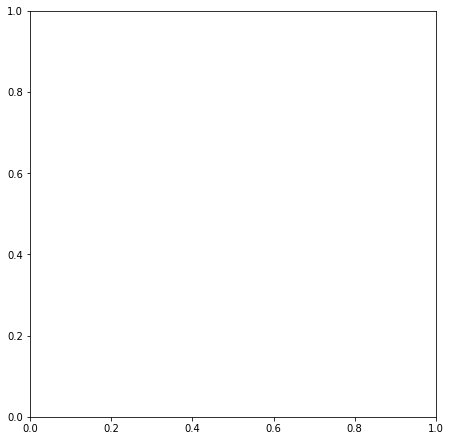

In [12]:
img = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')
edges = cv2.Canny(img, 800, 400, True)
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Interactive Foreground Extraction using GrabCut Algorithm

[GrabCut algorithm](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html#grabcut)

Now we go for grabcut algorithm with OpenCV. OpenCV has the function, cv2.grabCut() for this. We will see its arguments first:

- *img* - Input image
- *mask* - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, **cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD**, or simply pass 0,1,2,3 to image.
- *rect* - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
- *bdgModel, fgdModel* - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
- *iterCount* - Number of iterations the algorithm should run.
- *mode* - It should be **cv2.GC_INIT_WITH_RECT** or **cv2.GC_INIT_WITH_MASK** or combined which decides whether we are drawing rectangle or final touchup strokes.


In [13]:
img = cv2.imread('./images/original/1C4PJLCX8KD22313106.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (450,40,800,900)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(figsize = (10, 10))

plt.imshow(img),plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
import cv2
cv2.saliency

AttributeError: module 'cv2.cv2' has no attribute 'saliency'

In [15]:
image = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
plt.imshow(saliencyMap)
plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'saliency'

In [16]:
# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(image)
 
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
gs = gridspec.GridSpec(2, 2)
gs.update(wspace = 0.10, hspace = 0.10)

fig, ax = plt.subplots(figsize = (16, 16))

plt.subplot(gs[0])
plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.subplot(gs[1])
plt.imshow(saliencyMap, cmap = 'gray')
plt.title('saliencyMap')
plt.subplot(gs[2])
plt.imshow(threshMap, cmap = 'gray')
plt.title('Thresh')

AttributeError: module 'cv2.cv2' has no attribute 'saliency'

## scikit-image

In [ ]:
from skimage.feature import hog
from skimage import data, exposure

In [1]:
# The original image is inverted as the object must be white.
image = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


NameError: name 'cv2' is not defined

In [ ]:
from skimage import io as skio
url = './images/original/1C4PJLCX8KD22313105.jpeg'
img = skio.imread(url, flatten=True)

In [ ]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

In [ ]:
from skimage import filters
sobel = filters.sobel(img)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

In [2]:
plt.imshow(sobel)

NameError: name 'sobel' is not defined

In [3]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

NameError: name 'filters' is not defined

In [4]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

NameError: name 'img' is not defined

In [5]:
light_spots.shape

NameError: name 'light_spots' is not defined

In [6]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

NameError: name 'light_spots' is not defined

In [7]:
dark_spots = np.array((img < 3).nonzero()).T

NameError: name 'img' is not defined

In [8]:
dark_spots.shape


NameError: name 'dark_spots' is not defined

In [9]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

NameError: name 'dark_spots' is not defined

### Making a seed mask

In [10]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

NameError: name 'img' is not defined

In [ ]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [ ]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

In [ ]:
background_mask = (ws == background)

In [ ]:
plt.imshow(~background_mask)

In [ ]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

In [1]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

NameError: name 'plt' is not defined

In [ ]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))


In [2]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)


NameError: name 'ws' is not defined

In [3]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

NameError: name 'plt' is not defined

In [4]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[600, 400] = 2 # foreground

NameError: name 'np' is not defined

In [5]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

NameError: name 'morphology' is not defined

In [6]:
fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)

NameError: name 'plt' is not defined

In [7]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')






In [8]:

# This is needed to display the images.
%matplotlib inline

In [24]:
import cv2
 
# Read the images
foreground = cv2.imread("./3IImages/1C4HJXFG3JW25731201.jpg")
background = cv2.imread("./background.png")
alpha = cv2.imread("./Alpha/1C4HJXFG3JW25731201.png")


In [26]:
 
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
 


AttributeError: 'NoneType' object has no attribute 'astype'

In [ ]:
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255
 
# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)
 
# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)
 
# Add the masked foreground and background.
outImage = cv2.add(foreground, background)
 

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.imshow(outImage/255)

In [14]:
import cv2
 
# Read the images
foreground = cv2.imread("./3IImages/1C4HJXFG3JW25731201.jpg")

# foreground = cv2.imread("./2_.png")
# Display image
# cv2.imshow("foreground", foreground/255)
# cv2.waitKey(0)

In [15]:
import cv2
# background = cv2.imread("./22.png")
background = cv2.imread("./Background1920.jpeg")
# cv2.imshow("background", background/255)
# cv2.waitKey(0)

In [16]:
import cv2
alpha = cv2.imread("./Alpha/1C4HJXFG3JW25731201.jpg")

# cv2.imshow("alpha", alpha/255)
# cv2.waitKey(0)

In [17]:
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
 



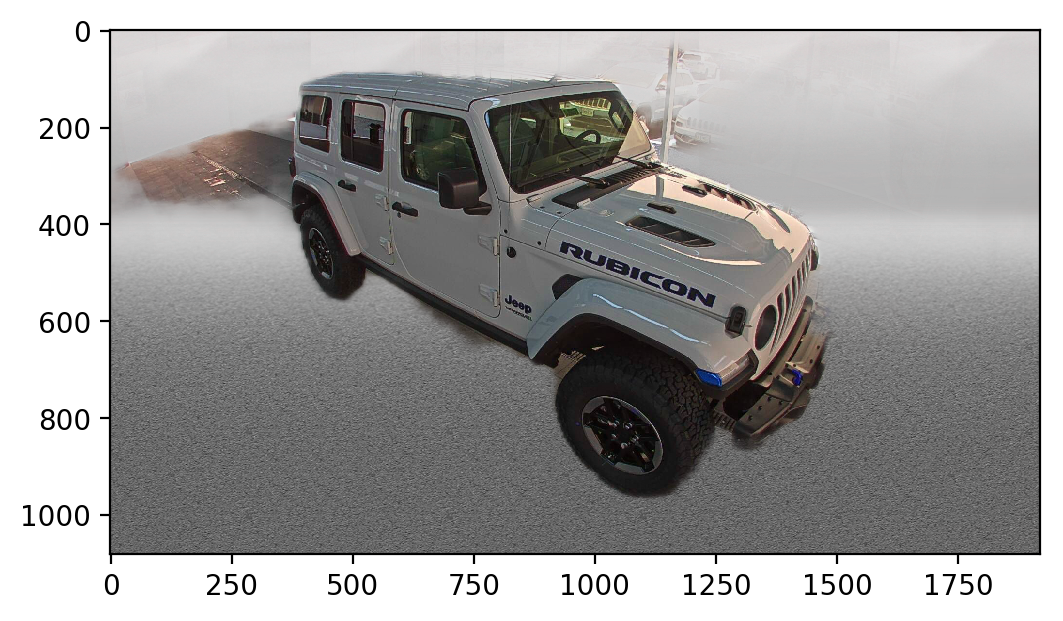

In [18]:
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255
 
# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)
 
# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)
 
# Add the masked foreground and background.
outImage = cv2.add(foreground, background)
 
# Display image
# cv2.imshow("outImg", outImage/255)
# cv2.waitKey(0)

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.imshow(outImage/255)

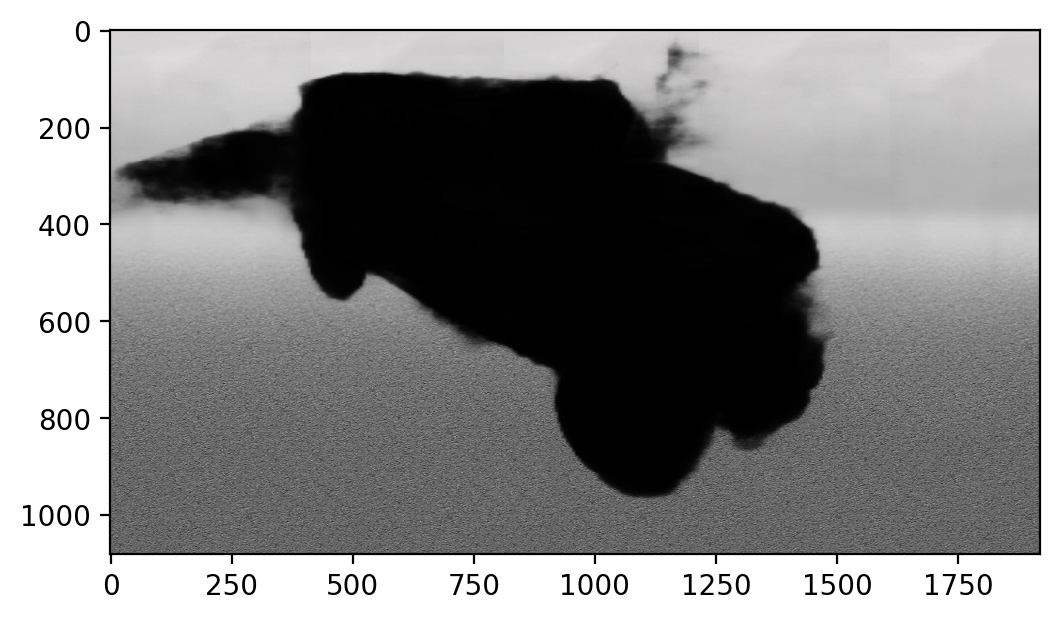

In [19]:
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255
 
# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)
 
# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)
 
# Add the masked foreground and background.
outImage = cv2.add(foreground, background)
 
# Display image
# cv2.imshow("outImg", outImage/255)
# cv2.waitKey(0)

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.imshow(outImage/255)

In [20]:
import cv2
 
# Read the images
foreground = cv2.imread("./3IImages/1C4HJXFG3JW25731201.jpg")
background = cv2.imread("./background.png")
alpha = cv2.imread("./Alpha/1C4HJXFG3JW25731201.png")

In [21]:
contour=cv2.drawContours(alpha, [c], -1, (0, 255, 255), 2)

NameError: name 'c' is not defined

In [22]:
import sys
import numpy
import cv2
#get the image.
im = cv2.imread(r'C:\Users\tiba\Documents\python\Images\hand1.jpg')
im_ycrcb = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)
 
skin_ycrcb_mint = numpy.array((0, 133, 77))
skin_ycrcb_maxt = numpy.array((255, 173, 127))
skin_ycrcb = cv2.inRange(im_ycrcb, skin_ycrcb_mint, skin_ycrcb_maxt)
#save binary image.
cv2.imwrite(r'C:\Users\tiba\Documents\python\Images\hand1_b.jpg', skin_ycrcb)
#Contour approximation method.
contours, _ = cv2.findContours(skin_ycrcb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area > 1000:
        cv2.drawContours(im, contours, i, (255, 0, 0), 3)
#save result.
cv2.imwrite(r'C:\Users\tiba\Documents\python\Images\hand1_c.jpg', im)


error: /io/opencv/modules/imgproc/src/color.cpp:10671: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import glob
import cv2
import time

filenames=glob.glob("./3IImages/*.jpg")
# print(glob.glob("./3IImages/*.jpg"))
print(len(filenames))
for x in range(len(filenames)):
    file_name = os.path.basename(filenames[x])
#     print(filenames[x])
    file=(os.path.splitext(file_name)[0]+'.jpg')
#     print ("./test_output/"+file)
    foreground = cv2.imread(filenames[x])
    background = cv2.imread("./Background1920.jpeg")
    alpha = cv2.imread("./test_output/"+file)
    # Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)
    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = alpha.astype(float)/255
 
    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alpha, foreground)
 
    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alpha, background)
 
    # Add the masked foreground and background.
    outImage = cv2.add(foreground, background)
 
    # Display image
    # cv2.imshow("outImg", outImage/255)
    # cv2.waitKey(0)

    #%matplotlib inline
    #plt.rcParams['figure.dpi'] = 200
    #plt.savefig('outImage')
    #plt.imshow(outImage/255)
    # Display image
    #cv2.imshow("outImage", outImage/255)
    #cv2.waitKey(0)
    cv2.imwrite("./MattedImage/"+file,outImage)
    #time.sleep(5)
    cv2.waitKey(0)
